
Project to be completed by internship candidates:

1.	Data:
The attached CSV file provides geospatial logs coming from different equipments at a regular interval. Below is the brief description of each attribute:

    A. track_record_id: Unique number given to each log
    
    B. status_code: Log correctness code (61445 indicates good log, all other status code indicate bad)  
    
    C. latitude_gps: latitude of the equipment at the given time
    
    D. longitude_gps: longitude of the equipment at the given time
    
    E. device_id_x: Equipment identifier (used by team x) 
    
    F. device_time_stamp: time (datetime) when log is created
    
    G. asset_type: 4xxx = movable equipment type 1; 6xxx = stationary equipment type 1;  8xxx = movable equipment type 2; 7xxx = stationary equipment type 2
    
    H. packet_generating_station_id: Equipment identifier (to be used by internship candidate)
    
    I. track_num1: Indicates whether equipment ignition is ON (1) or OFF (0)
    
    J. asset_id_project: Equipment identifier (used by team y)
    
    K. project_id: project number where the equipment is working at the given time
    
    L. supportsite_id: segment of project to which the equipment is assigned to


2.	Problem:
Understand, clean and analyze the data. Using geospatial coordinates, come up with reports providing:
    
    A. Distance traveled: total distance (unit: km) covered by each equipment on daily basis

    B. ON time: total time (unit: hour) for which ignition of each equipment was ON (track_num1 = 1)

    C. Equipments in the vicinity: if a main equipment is at the location of (latitude = 28.09029007, longitude = 77.33970642), provide a map (one map for each day) showing: a. geofence/circle of radius=100m around the main equipment; b. Equipments present inside fence between 9:00am and 9:10am (one map each day)

3.	Report:
The submission must include following:
    
    A. Flowchart / pseudocode briefly describing your approach.
    
    B. Code files
    
    C. Tabular reports, plots and maps

4.	Extra:
    
    Additional PPT which can be used to present results is encouraged.


In [1]:
import numpy as np
import matplotlib
import pandas as pd

In [2]:
df= pd.read_csv('data.csv',sep=',',usecols=['status_code',"latitude_gps","longitude_gps","device_id_x","device_time_stamp","track_num1"])

C:\Users\Public\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,status_code,latitude_gps,longitude_gps,device_id_x,device_time_stamp,track_num1
0,61441,0,0,1001020218,12/13/2017 0:00,0
1,61441,0,0,1001020218,12/13/2017 0:01,0
2,61441,0,0,1001020218,12/13/2017 0:02,0
3,61441,0,0,1001020218,12/13/2017 0:03,0
4,61441,0,0,1001020218,12/13/2017 0:04,0
5,61441,0,0,1001020218,12/13/2017 0:05,0
6,61441,0,0,1001020218,12/13/2017 0:06,0
7,61441,0,0,1001020218,12/13/2017 0:07,0
8,61441,0,0,1001020218,12/13/2017 0:08,0
9,61441,0,0,1001020218,12/13/2017 0:09,0


In [4]:
df=df[df["status_code"]==61445] #keeping only the proper logs

print(df.shape)

(34453, 6)


### A. Distance traveled: total distance (unit: km) covered by each equipment on daily basis

In [5]:
#finding the number of unique devices

unique_devices=df['device_id_x'].unique()

In [6]:
df["date"],df['time']=df["device_time_stamp"].str.split(' ',1).str
df['hour'],df["minute"]=df['time'].str.split(':',1).str

C:\Users\Public\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Public\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
unique_date=df['date'].unique()
df.columns
unique_date

array(['12/17/2017'], dtype=object)

In [8]:
def dist(lat1,lat2,long1,long2):
    lat1=float(lat1)
    lat2=float(lat2)
    long1=float(long1)
    long2=float(long2)
    p = 0.017453292519943295
    dlat=p*(lat2-lat1)
    dlon=p*(long2-long1)
    a = pow(math.sin(dlat/2),2) + math.cos(p*lat1) * math.cos(p*lat2) * pow(math.sin(dlon/2),2) 
    c = 2 * math.atan2( math.sqrt(a), math.sqrt(1-a) ) 
    d = 6373 * c #(where 6373 is the radius of the Earth)
    return d

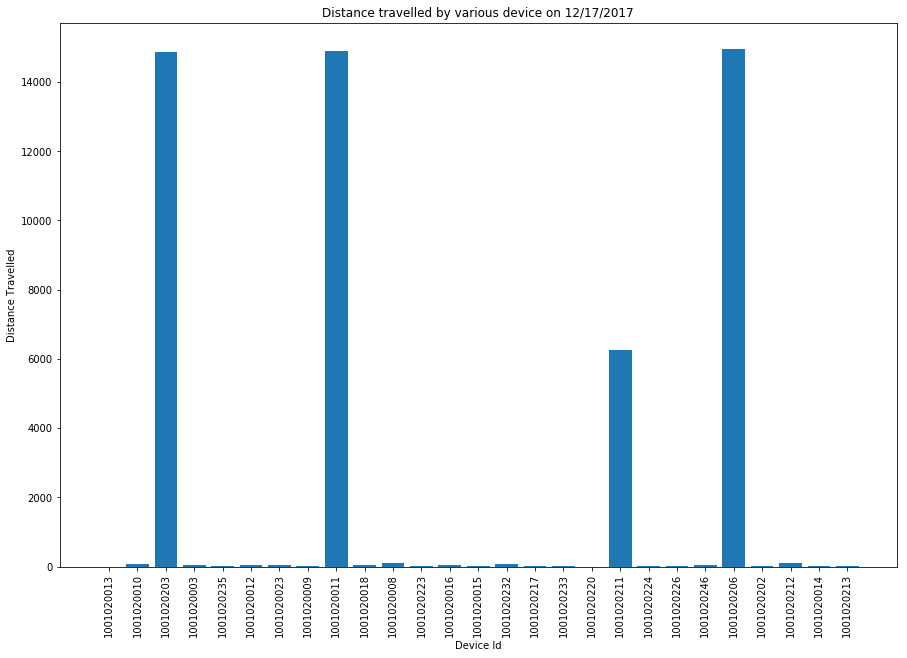

In [9]:
import math
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
for day in unique_date:
    #print("----------------day",day)
    data=[]
    label=[]
    for dev_id in unique_devices:
        #print("dev is",dev_id)
        k=df[(df['date']==day) & (df['device_id_x']==dev_id)]
        lat=k['latitude_gps'].values
        long=k['longitude_gps'].values
        #print(lat.shape)
        distance = 0
        for i in range(lat.shape[0]-1):
            if lat[i]==lat[i+1] and long[i]==long[i+1]:
                pass
            else:
                distance=distance+dist(lat[i],lat[i+1],long[i],long[i+1])
                #print(lat[i],lat[i+1],long[i],long[i+1],d)
                #print(d)
        #print(distance)
        data.append(distance)
        label.append(str(dev_id))
        
table=pd.DataFrame({"device_id":label,"distance travelled":data})

plt.figure(figsize=(15,10))
plt.title("Distance travelled by various device on 12/17/2017")
plt.xlabel('Device Id', fontsize=10)
plt.ylabel('Distance Travelled', fontsize=10)
plt.xticks(np.arange(len(label)), label, fontsize=10, rotation=90)
plt.bar(label,data)
plt.show()

In [10]:
print("Distance Travelled by various devices on 12/17/2017")
table

Distance Travelled by various devices on 12/17/2017


,device_id,distance travelled
0,1001020013,0.218827
1,1001020010,66.652768
2,1001020203,14879.896572
3,1001020003,54.176876
4,1001020235,13.288995
5,1001020012,44.037411
6,1001020023,52.898590
7,1001020009,21.291156
8,1001020011,14904.948212
9,1001020018,46.351791


###     B. ON time: total time (unit: hour) for which ignition of each equipment was ON (track_num1 = 1)


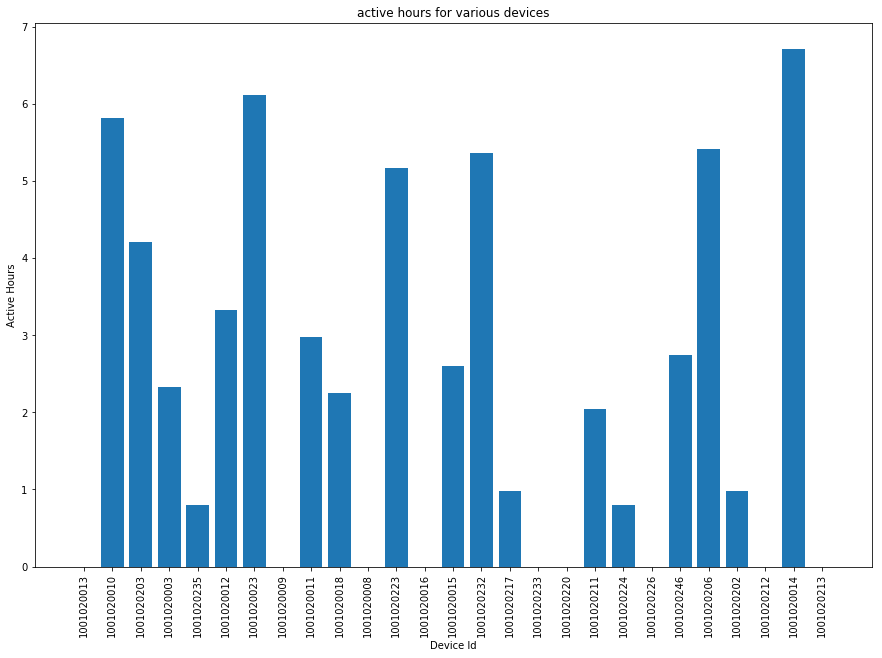

In [11]:
import math
import matplotlib.pyplot as plt
%matplotlib inline  
for day in unique_date:
    #print("----------------day",day)
    data=[]
    label=[]
    for dev_id in unique_devices:
        #print("dev is",dev_id)
        k=df[(df['date']==day) & (df['device_id_x']==dev_id) & (df['track_num1']==1)]
        #print(k.shape)
        data.append(k.shape[0]/60)
        label.append(str(dev_id))



#print(data,label)
plt.figure(figsize=(15,10))
plt.title("active hours for various devices")
plt.xlabel('Device Id', fontsize=10)
plt.ylabel('Active Hours', fontsize=10)
plt.xticks(np.arange(len(label)), label, fontsize=10, rotation=90)
plt.bar(label,data)
plt.show()
                

### C. Equipments in the vicinity: if a main equipment is at the location of (latitude = 28.09029007, longitude = 77.33970642), provide a map (one map for each day) showing: a. geofence/circle of radius=100m around the main equipment; b. Equipments present inside fence between 9:00am and 9:10am (one map each day)


In [12]:
df=df.astype({"hour":int,"minute":int})
df=df[(df["hour"]==9) & (df["minute"] >= 0) & (df["minute"] <= 10) ]
df

,status_code,latitude_gps,longitude_gps,device_id_x,device_time_stamp,track_num1,date,time,hour,minute
197336,61445,28.1422,77.3799,1001020010,12/17/2017 9:01,1,12/17/2017,9:01,9,1
197337,61445,28.1422,77.38,1001020010,12/17/2017 9:02,1,12/17/2017,9:02,9,2
197338,61445,28.1422,77.38,1001020010,12/17/2017 9:04,1,12/17/2017,9:04,9,4
197339,61445,28.1422,77.38,1001020010,12/17/2017 9:05,1,12/17/2017,9:05,9,5
197340,61445,28.1419,77.3796,1001020010,12/17/2017 9:08,1,12/17/2017,9:08,9,8
197341,61445,28.1419,77.3796,1001020010,12/17/2017 9:09,1,12/17/2017,9:09,9,9
198725,61445,28.1431,77.3731,1001020203,12/17/2017 9:00,1,12/17/2017,9:00,9,0
198726,61445,28.144,77.3697,1001020203,12/17/2017 9:01,1,12/17/2017,9:01,9,1
198727,61445,28.1445,77.364,1001020203,12/17/2017 9:02,1,12/17/2017,9:02,9,2
198728,61445,28.1452,77.3597,1001020203,12/17/2017 9:03,1,12/17/2017,9:03,9,3


In [13]:
for day in unique_date:
    df_date=df[df["date"]==day]
    #print(df_date["device_id_x"].unique())
    for index, row in df_date.iterrows():
        if dist(row["latitude_gps"],28.09029007,row["longitude_gps"],77.33970642)<= 0.1:
            print(row["device_id_x"])

#### there are no devices in 100 m radius of main equipment

## Number of devices in 5 Km radius are

In [14]:
lat=[]
long=[]
label=[]
for day in unique_date:
    df_date=df[df["date"]==day]
    #print(df_date["device_id_x"].unique())
    for index, row in df_date.iterrows():
        if dist(row["latitude_gps"],28.09029007,row["longitude_gps"],77.33970642)<= 5.0:
                label.append(str(row["device_id_x"])+" at "+row["device_time_stamp"])
                lat.append(row["latitude_gps"])
                long.append(row["longitude_gps"])
            
            

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode(connected=True)

In [16]:
def createGeoJSONCircle(lat,long,radius,points=64):
    km=radius
    ret = [];
    latarr=[]
    longarr=[]
    distanceX = km/(111.320*math.cos(lat*math.pi/180));
    distanceY = km/110.574;

    for i in range(points):
        theta = (i/points)*(2*math.pi)
        x = distanceX*math.cos(theta)
        y = distanceY*math.sin(theta)
        latarr.append(y+lat)
        longarr.append(x+long)
    latarr.append(latarr[0])
    longarr.append(longarr[0])
    return latarr,longarr
        

In [17]:
mapbox_access_token = 'pk.eyJ1IjoibG9sMTIzNCIsImEiOiJjanBjM3RmcTMwNGdxM2tudjFydzE3bWx2In0.kocFVhSWmgwvBSg4bL5PNg'

lata,longa=createGeoJSONCircle(28.09029007,77.33970642,5,64)
data = [
    go.Scattermapbox(
        lat=['28.09029007'],
        lon=['77.33970642'],
        mode='markers',
        marker=dict(
            size=9,
            color='red'
        ),
        text=["Main Equipment"],
    )
    ,
    go.Scattermapbox(
        lat=lat,
        lon=long,
        mode='markers',
        marker=dict(
            size=9,
            color='blue'
        ),
        text=label,
    ),
    
    
    go.Scattermapbox(
        lon = longa,
        lat = lata,
        mode='lines',
    )
]

layout = go.Layout(
    title="Devices in 5 km radius of Main equipment",
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=28.09,
            lon=77.33
        ),
        pitch=0,
        zoom=10
    ),
)

data

[Scattermapbox({
     'lat': [28.09029007],
     'lon': [77.33970642],
     'marker': {'color': 'red', 'size': 9},
     'mode': 'markers',
     'text': [Main Equipment]
 }), Scattermapbox({
     'lat': [28.09967041, 28.09966087, 28.09966087, 28.09964943, 28.09966087,
             28.09964943, 28.09966087, 28.09964943, 28.09966087, 28.09966087,
             28.09967041, 28.09962082, 28.09962082, 28.09963036, 28.09960938,
             28.0995903, 28.09960938, 28.09963989, 28.09963036, 28.09963036,
             28.09962082, 28.09901047, 28.09897041, 28.09896088, 28.09897041,
             28.09906006, 28.09942055, 28.09942055, 28.09923935, 28.09951019,
             28.09881973, 28.09882927],
     'lon': [77.36691284, 77.36691284, 77.36691284, 77.36691284, 77.36689758,
             77.36688995, 77.36689758, 77.36691284, 77.36691284, 77.36689758,
             77.36688995, 77.36215973, 77.36216736, 77.36216736, 77.36213684,
             77.36212158, 77.36212158, 77.36213684, 77.36215973, 77.3

In [18]:
fig = dict(data=data, layout=layout)
fig

{'data': [Scattermapbox({
      'lat': [28.09029007],
      'lon': [77.33970642],
      'marker': {'color': 'red', 'size': 9},
      'mode': 'markers',
      'text': [Main Equipment]
  }), Scattermapbox({
      'lat': [28.09967041, 28.09966087, 28.09966087, 28.09964943, 28.09966087,
              28.09964943, 28.09966087, 28.09964943, 28.09966087, 28.09966087,
              28.09967041, 28.09962082, 28.09962082, 28.09963036, 28.09960938,
              28.0995903, 28.09960938, 28.09963989, 28.09963036, 28.09963036,
              28.09962082, 28.09901047, 28.09897041, 28.09896088, 28.09897041,
              28.09906006, 28.09942055, 28.09942055, 28.09923935, 28.09951019,
              28.09881973, 28.09882927],
      'lon': [77.36691284, 77.36691284, 77.36691284, 77.36691284, 77.36689758,
              77.36688995, 77.36689758, 77.36691284, 77.36691284, 77.36689758,
              77.36688995, 77.36215973, 77.36216736, 77.36216736, 77.36213684,
              77.36212158, 77.36212158, 77.3

In [19]:
iplot(fig)